C:\Users\Rizos\AppData\Local\Temp\ipykernel_16912\2105030132.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  503 of 503 completed
Index(['NVDA', 'META', 'PHM', 'ADBE', 'GE', 'AVGO', 'LLY', 'RCL', 'ANET',
       'FICO'],
      dtype='object')
[*********************100%***********************]  1 of 1 completed


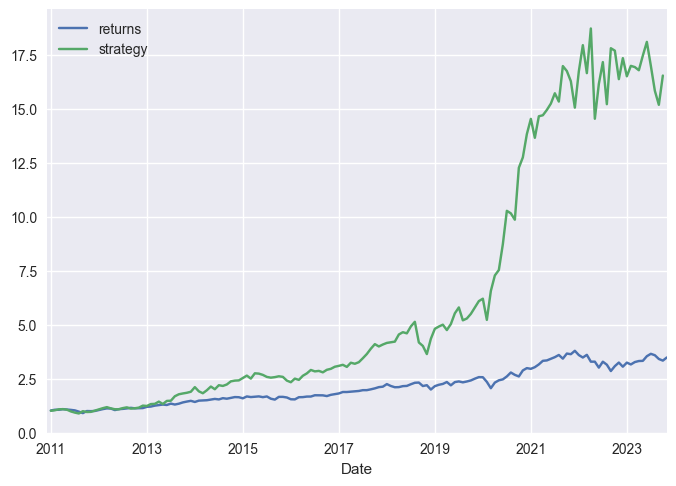

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn")

class MarketAnalysis:
    def __init__(self, tickers, start_date, interval='1mo'):
        self.tickers = [ticker.replace('.', '-') for ticker in tickers]
        self.start_date = start_date
        self.interval = interval
        self.data = self.download_data()
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns = self.calculate_rolling_returns(self.monthly_returns, 12)

    @staticmethod
    def fetch_tickers():
        us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        return us500_table['Symbol'].to_list()

    def download_data(self):
        df = yf.download(tickers=self.tickers, start=self.start_date, interval=self.interval)['Adj Close']
        return df

    def calculate_monthly_returns(self):
        monthly_returns = np.log(self.data.div(self.data.shift(1)))[1:]
        return monthly_returns

    def calculate_rolling_returns(self, df, n):
        return df.rolling(n).sum().apply(np.exp)

    def get_top_tickers(self, date):
        top = self.rolling_returns.loc[date].nlargest(10).index
        return top

    def portfolio_performance(self, date):
        portfolio = self.monthly_returns.loc[date:, self.get_top_tickers(date)].shift(-1).head(1)
        return portfolio.mean(axis=1).values[0]

    def get_current_month_tickers(self):
        return self.get_top_tickers(self.monthly_returns.index[-1])

    def plot_performance(self):
        returns = []
        for date in self.monthly_returns.index[:-1]:
            returns.append(self.portfolio_performance(date))
        
        strategy = pd.Series(returns, index=self.monthly_returns.index[:-1]).cumsum().apply(np.exp)
        nas_df = yf.download('^GSPC', start=self.start_date, interval=self.interval)['Adj Close'].to_frame()
        nas_df["returns"] = np.log(nas_df['Adj Close'].div(nas_df['Adj Close'].shift(1)))
        nas_df["returns"] = nas_df["returns"].cumsum().apply(np.exp)
        nas_df['strategy'] = strategy
        nas_df[['returns', 'strategy']].plot()


# Użycie klasy
tickers = MarketAnalysis.fetch_tickers()
market_analysis = MarketAnalysis(tickers, '2010-12-31', '1mo')
current_month_tickers = market_analysis.get_current_month_tickers()
print(current_month_tickers)

# Rysowanie wykresu
market_analysis.plot_performance()
plt.show()

C:\Users\Rizos\AppData\Local\Temp\ipykernel_15356\4057175347.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  503 of 503 completed
Index(['NVDA', 'CEG', 'LLY', 'ADBE', 'RCL', 'AVGO'], dtype='object')
[*********************100%***********************]  1 of 1 completed


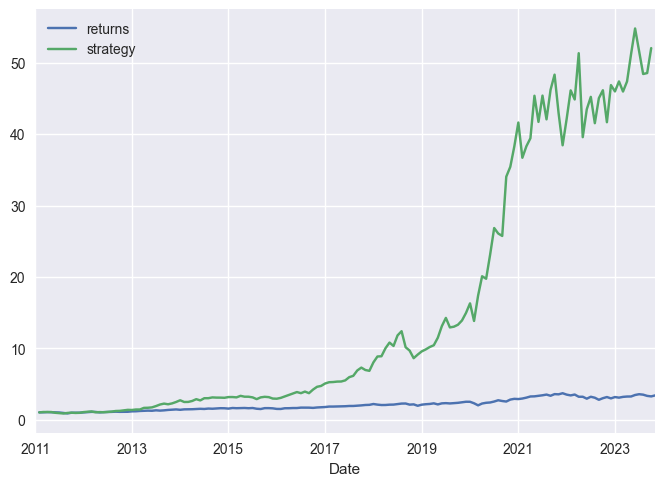

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import brute

plt.style.use("seaborn")

class MarketData:
    def __init__(self, start_date):
        self.start_date = start_date
        self.us500_table = self._fetch_us500_table()
        self.removed_stocks = self._fetch_removed_stocks()
        self.stocks = self._compile_stocks_list()
        self.data = self._download_data()
        self._apply_filters()

    def _fetch_tickers_data(self):
        return pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

    def _fetch_removed_stocks(self):
        removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
        removed.set_index(pd.to_datetime(removed['Date']), inplace=True)
        return removed[removed.index >= self.start_date]['Removed']

    def _compile_stocks_list(self):
        stocks = self.tickers_data[self.tickers_data['Date added'] >= self.start_date]['Symbol'].tolist()
        stocks.extend(self.removed_stocks['Ticker'].tolist())
        return stocks

    def _download_data(self):
        return yf.download(self.stocks, start=self.start_date, interval='1mo')['Close']

    def _apply_filters(self):
        for ticker in self.stocks:
            if ticker in self.removed_stocks['Ticker'].values:
                self.data[ticker] = self.data[ticker][self.data[ticker].index <= self.removed_stocks[self.removed_stocks['Ticker'] == ticker].index[0]]
            if ticker in self.tickers_data['Symbol'].values:
                self.data[ticker] = self.data[ticker][self.data[ticker].index >= self.tickers_data[self.tickers_data['Symbol'] == ticker]['Date added'].values[0]]

    @staticmethod
    def get_data(self):
        return self.data

class MarketAnalysis:
    def __init__(self, start_date, window=7, nlargest_window=6):
        # self.tickers = self.fetch_tickers()
        self.start_date = start_date
        # self.interval = interval
        self.window = window
        self.nlargest_window = nlargest_window
        self.data = MarketData(self.start_date)
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)


    # # @staticmethod
    # def fetch_tickers(self):
    #     tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    #     tickers['Symbol'].to_list()
    #     tickers = tickers[tickers['Date added'] >= self.start_date]
    #     removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
    #     removed = removed.set_index(removed.Date.Date)
    #     removed.index = pd.to_datetime(removed.index)
    #     removed = removed[removed.index >= self.start_date]
    #     removed = removed.Removed.dropna()
    #     tickers.extend(removed['Ticker'].to_list())
    #     tickers = [ticker.replace('.', '-') for ticker in tickers]
    #     return tickers

    # def download_data(self):
    #     df = yf.download(tickers=self.tickers, start=self.start_date, interval=self.interval)['Adj Close']
    #     return df

    def calculate_monthly_returns(self):
        monthly_returns = np.log(self.data.div(self.data.shift(1)))[1:]
        return monthly_returns

    def calculate_rolling_returns(self, df, n):
        return df.rolling(n).sum().apply(np.exp)

    def get_top_tickers(self, date):
        # Zwraca indeksy top tickers tylko z 'window' bez odwoływania się do 'small_window'
        top_window = self.rolling_returns_large.loc[date].nlargest(self.nlargest_window).index
        return top_window

    def portfolio_performance(self, date):
        portfolio = self.monthly_returns.loc[date:, self.get_top_tickers(date)].shift(-1).head(1)
        return portfolio.mean(axis=1).values[0]

    def get_current_month_tickers(self):
        return self.get_top_tickers(self.monthly_returns.index[-1])

    def plot_performance(self):
        returns = []
        for date in self.monthly_returns.index[:-1]:
            returns.append(self.portfolio_performance(date))
        
        strategy = pd.Series(returns, index=self.monthly_returns.index[:-1]).cumsum().apply(np.exp)
        nas_df = yf.download('^GSPC', start=self.start_date, interval=self.interval)['Adj Close'].to_frame()
        nas_df["returns"] = np.log(nas_df['Adj Close'].div(nas_df['Adj Close'].shift(1)))
        nas_df["returns"] = nas_df["returns"].cumsum().apply(np.exp)
        nas_df['strategy'] = strategy
        nas_df[['returns', 'strategy']].plot()

        # Nowa metoda do optymalizacji
    def optimize_parameters(self, window_range, nlargest_range, step=1):
            """
            Optymalizuje parametry window i nlargest_window.
            
            :param window_range: krotka (min, max) dla window
            :param nlargest_range: krotka (min, max) dla nlargest_window
            :param step: krok przeszukiwania
            :return: najlepsze znalezione parametry
            """
            
            def objective(params):
                self.window, self.nlargest_window = int(params[0]), int(params[1])
                self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)
                returns = []
                for date in self.monthly_returns.index[:-1]:
                    try:
                        returns.append(self.portfolio_performance(date))
                    except KeyError:
                        returns.append(0)
                cumulative_performance = np.exp(np.sum(np.log1p(returns)))
                return -cumulative_performance  # minus, ponieważ brute szuka minimum

            ranges = (slice(window_range[0], window_range[1], step), slice(nlargest_range[0], nlargest_range[1], step))
            
            result = brute(objective, ranges, full_output=True, finish=None)
            return result[0], -result[1]


tickers = MarketAnalysis.fetch_tickers()
market_analysis = MarketAnalysis(tickers, '2010-12-31', '1mo')
current_month_tickers = market_analysis.get_current_month_tickers()
print(current_month_tickers)

# Rysowanie wykresu
market_analysis.plot_performance()
plt.show()

[*********************100%***********************]  689 of 689 completed

105 Failed downloads:
- MNK: No timezone found, symbol may be delisted
- BBBY: No timezone found, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- LM: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- SWY: No data found for this date range, symbol may be delisted
- PBCT: No timezone found, symbol may be delisted
- LLTC: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- ESRX: No data found for this date range, symbol may be delisted
- SNDK: No data found for this date range, symbol may be delisted
- BXLT: No data found for this date range, symbol may be delisted
- AET: No data found for this date range, symbol may be delisted
- GGP: No data found for this date range, symbol may be delisted
- CXO: No timezone found, symbo

,Adj Close,returns,strategy
Date,,,
2015-01-01,1994.989990,NaN,NaN
2015-02-01,2104.500000,1.054893,0.951201
2015-03-01,2067.889893,1.036541,0.969080
2015-04-01,2085.510010,1.045374,0.958231
2015-05-01,2107.389893,1.056341,0.922359
...,...,...,...
2023-07-01,4588.959961,2.300242,3.628964
2023-08-01,4507.660156,2.259490,3.361662
2023-09-01,4288.049805,2.149409,3.277822


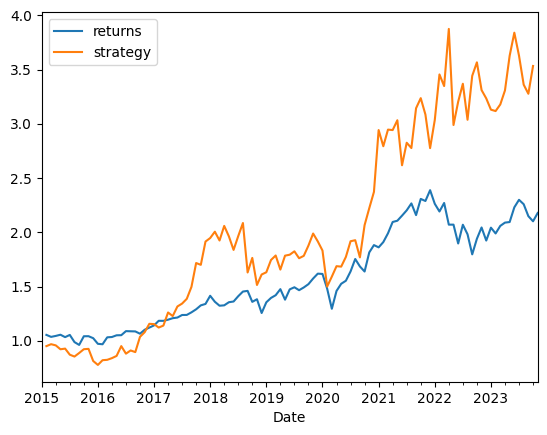

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import brute

class StockData:
    def __init__(self, start_date):
        self.start = start_date
        self.tickers = []
        self.df = pd.DataFrame()
        self.us500_table = None
        self.removed_tickers = None

    def _fetch_tickers(self):
        us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        self.tickers = us500_table['Symbol'].to_list()
        self.us500_table = us500_table[us500_table['Date added'] >= self.start]

    def _fetch_removed_tickers(self):
        removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
        removed_tickers.columns = removed_tickers.columns.get_level_values(1)
        self.removed_tickers = removed_tickers[['Date', 'Ticker']]
        self.removed_tickers.set_index('Date', inplace=True)
        self.removed_tickers.index = pd.to_datetime(self.removed_tickers.index)
        self.removed_tickers = self.removed_tickers[self.removed_tickers.index >= self.start].dropna()

    def _combine_tickers(self):
        self.tickers.extend(self.removed_tickers.Ticker.tolist())

    def _download_data(self):
        self.df = yf.download(self.tickers, start=self.start, interval='1mo')['Close']
        self.df.index = pd.to_datetime(self.df.index)

    def _pricefilter_rem(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index <= self.removed_tickers[self.removed_tickers.Ticker == ticker].index[0]]

    def _pricefilter_add(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index >= self.us500_table[self.us500_table.Symbol == ticker]['Date added'].values[0]]

    def _apply_filters(self):
        for removed_ticker in self.removed_tickers['Ticker']:
            self._pricefilter_rem(removed_ticker)
        for ticker_added in self.us500_table['Symbol']:
            self._pricefilter_add(ticker_added)

    def get_data(self):
        if self.df.empty:
            self._fetch_tickers()
            self._fetch_removed_tickers()
            self._combine_tickers()
            self._download_data()
            self._apply_filters()
        
        return self.df

class MarketAnalysis:

    def __init__(self, start_date, window=8, nlargest_window=6):
        self.start_date = start_date
        self.window = window
        self.nlargest_window = nlargest_window
        self.market_data = StockData(self.start_date)
        self.data = self.market_data.get_data()
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)

    def calculate_monthly_returns(self):
        monthly_returns = np.log(self.data.div(self.data.shift(1)))[1:]
        return monthly_returns

    def calculate_rolling_returns(self, df, n):
        return df.rolling(n).sum().apply(np.exp)

    def get_top_tickers(self, date):
        # Zwraca indeksy top tickers tylko z 'window' bez odwoływania się do 'small_window'
        top_window = self.rolling_returns_large.loc[date].nlargest(self.nlargest_window).index
        return top_window

    def portfolio_performance(self, date):
        portfolio = self.monthly_returns.loc[date:, self.get_top_tickers(date)].shift(-1).head(1)
        return portfolio.mean(axis=1).values[0]

    def get_current_month_tickers(self):
        return self.get_top_tickers(self.monthly_returns.index[-1])

    def plot_performance(self):
        returns = []
        for date in self.monthly_returns.index[:-1]:
            returns.append(self.portfolio_performance(date))
        
        strategy = pd.Series(returns, index=self.monthly_returns.index[:-1]).cumsum().apply(np.exp)
        nas_df = yf.download('^GSPC', start=self.start_date, interval='1mo')['Adj Close'].to_frame()
        nas_df["returns"] = np.log(nas_df['Adj Close'].div(nas_df['Adj Close'].shift(1)))
        nas_df["returns"] = nas_df["returns"].cumsum().apply(np.exp)
        nas_df['strategy'] = strategy
        nas_df[['returns', 'strategy']].plot()
        self.result_data = nas_df

        # Nowa metoda do optymalizacji
    def optimize_parameters(self, window_range, nlargest_range, step=1):
            """
            Optymalizuje parametry window i nlargest_window.
            
            :param window_range: krotka (min, max) dla window
            :param nlargest_range: krotka (min, max) dla nlargest_window
            :param step: krok przeszukiwania
            :return: najlepsze znalezione parametry
            """
            
            def objective(params):
                self.window, self.nlargest_window = int(params[0]), int(params[1])
                self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)
                returns = []
                for date in self.monthly_returns.index[:-1]:
                    try:
                        returns.append(self.portfolio_performance(date))
                    except KeyError:
                        returns.append(0)
                cumulative_performance = np.exp(np.sum(np.log1p(returns)))
                return -cumulative_performance  # minus, ponieważ brute szuka minimum

            ranges = (slice(window_range[0], window_range[1], step), slice(nlargest_range[0], nlargest_range[1], step))
            
            result = brute(objective, ranges, full_output=True, finish=None)
            return result[0], -result[1]


market_analysis = MarketAnalysis( start_date = '2015-01-01')
current_month_tickers = market_analysis.get_current_month_tickers()
print(current_month_tickers)

# Rysowanie wykresu
market_analysis.plot_performance()
market_analysis.result_data



In [7]:
js = market_analysis.result_data[['returns','strategy']]
js

,returns,strategy
Date,,
2015-01-01,NaN,NaN
2015-02-01,1.054893,0.951201
2015-03-01,1.036541,0.969080
2015-04-01,1.045374,0.958231
2015-05-01,1.056341,0.922359
...,...,...
2023-07-01,2.300242,3.628964
2023-08-01,2.259490,3.361662
2023-09-01,2.149409,3.277822


In [6]:
# Użycie zaktualizowanej metody optymalizacji
optimal_params, best_performance = market_analysis.optimize_parameters((1, 24), (5, 15), step=1)
print(f"Optimal parameters - Large window: {int(optimal_params[0])}, N largest: {int(optimal_params[1])}")
print(f"Best performance: {best_performance}")

Optimal parameters - Large window: 8, N largest: 6
Best performance: 6.927595363494359


[*********************100%***********************]  503 of 503 completed


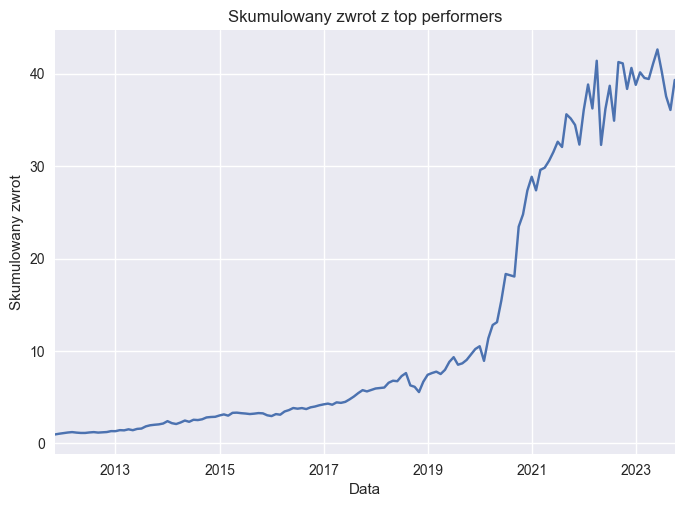

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute

class InvestmentAnalyzer:
    def __init__(self, df, window=12, top_n=10):
        self.df = df
        self.window = window
        self.top_n = top_n
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns = self.calculate_rolling_returns()

    def calculate_monthly_returns(self):
        ret_df = self.df.pct_change()
        monthly_returns = (ret_df + 1).resample('M').prod()
        return monthly_returns

    def calculate_rolling_returns(self):
        rolling_returns = (self.monthly_returns ).rolling(self.window).apply(np.prod, raw=True) 
        return rolling_returns.dropna()

    def get_top_performers(self, date):
        try:
            top = self.rolling_returns.loc[date].nlargest(self.top_n)
            relevant_returns = self.monthly_returns[top.name:][1:2][top.index]
            return relevant_returns.mean(axis=1).values[0]
        except KeyError:
            print(f"No data available for {date}")
            return None
        
    def get_top_tickers_for_month(self, date):
        try:
            top = self.rolling_returns.loc[date].nlargest(self.top_n)
            return top.index.tolist()  # Zwraca listę tickerów
        except KeyError:
            print(f"No data available for {date}")
            return None
        
    def get_next_month_top_tickers(self):
        latest_complete_month = self.monthly_returns.index[-1]
        return self.get_top_tickers_for_month(latest_complete_month)


    def simulate_investment(self):
        returns = []
        for date in self.rolling_returns.index[:-1]:
            performance = self.get_top_performers(date)
            if performance is not None:
                returns.append(performance)
        cumulative_returns = pd.Series(returns, index=self.rolling_returns.index[:-1]).cumprod()
        return cumulative_returns

    def plot_cumulative_returns(self, cumulative_returns):
        cumulative_returns.plot(title='Skumulowany zwrot z top performers')
        plt.xlabel('Data')
        plt.ylabel('Skumulowany zwrot')
        plt.show()
    
    def evaluate_performance(self, params):
        window, n_largest = int(params[0]), int(params[1])

        if window < 1 or n_largest < 1:
            return np.inf

        self.window = window
        self.top_n = n_largest
        try:
            self.rolling_returns = self.calculate_rolling_returns()
            performance = self.simulate_investment().iloc[-1]
            # Zwracamy negatywną wartość, ponieważ 'brute' szuka minimum funkcji
            return -performance
        except Exception as e:
            print(e)
            return np.inf

    def optimize_parameters(self, window_range, n_largest_range):
        """
        Optymalizuje wartości 'window' i 'n_largest' dla maksymalizacji łącznego zwrotu.
        """
        ranges = (window_range, n_largest_range)  # Zakresy do optymalizacji
        result = brute(
            self.evaluate_performance,
            ranges=ranges,
            full_output=True,
            finish=None  # Możemy wyłączyć dodatkową optymalizację po brute force
        )
        return result[0]  # Najlepsze znalezione 'window' i 'n_largest'

# Przykładowe użycie:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = tickers['Symbol'].to_list()
tickers = [ticker.replace('.', '-') for ticker in tickers]
df = yf.download(tickers=tickers, start='2010-12-31')['Adj Close']
df.index = pd.to_datetime(df.index)


analyzer = InvestmentAnalyzer(df, window=12, top_n=10)
cumulative_returns = analyzer.simulate_investment()
analyzer.plot_cumulative_returns(cumulative_returns)

# Przykładowe użycie:
# analyzer = InvestmentAnalyzer(df)
# optimal_params = analyzer.optimize_parameters(window_range=(1, 14), n_largest_range=(6, 10))
# print(f"Optimal parameters - Rolling window: {int(optimal_params[0])}, Top N: {int(optimal_params[1])}")

In [32]:
# analyzer.monthly_returns.index[-1]
analyzer.get_next_month_top_tickers()

['NVDA', 'META', 'PHM', 'ADBE', 'GE', 'AVGO', 'LLY', 'RCL', 'ANET', 'FICO']

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

start = '2010-01-01'

us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#list of tickers in us500 now
tickers = us500_table['Symbol'].to_list()

#removal of the tckers not existed before start date
us500_table = us500_table[us500_table['Date added'] >= start]

# fetching the table with delisted tickers
removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
removed_tickers.columns = removed_tickers.columns.get_level_values(1)
removed_tickers = removed_tickers[['Date', 'Ticker']]
removed_tickers = removed_tickers.set_index('Date')
removed_tickers.index = pd.to_datetime(removed_tickers.index)
removed_tickers = removed_tickers[removed_tickers.index >= start].dropna()

#add delisted tickers to tickers present in the US500 now
tickers.extend(removed_tickers.Ticker.tolist())
# remove the dots from tickers for yfinance
# tickers = [ticker.replace('.', '-') for ticker in tickers]

#donlowad the data for tickers
df = yf.download(tickers,start=start, interval='1mo')['Close']
df.index = pd.to_datetime(df.index)

#change the data for tickers after removal to NaN
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed_tickers[removed_tickers.Ticker == ticker].index[0]]

#change the data for tickers before they were arred to the US500 to NaN
def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= us500_table[us500_table.Symbol == ticker]['Date added'].values[0]]

#apply the functions for every ticker
for removed_ticker in removed_tickers['Ticker']:
    pricefilter_rem(removed_ticker)
for tickers_added in us500_table['Symbol']:
    pricefilter_add(tickers_added)



[*********************100%***********************]  763 of 763 completed

137 Failed downloads:
- CEPH: No data found for this date range, symbol may be delisted
- CCE: No data found for this date range, symbol may be delisted
- CAM: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- STJ: No data found for this date range, symbol may be delisted
- AVP: No timezone found, symbol may be delisted
- CBE: No data found for this date range, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- LM: No timezone found, symbol may be delisted
- GENZ: No data found for this date range, symbol may be delisted
- LLL: No timezone found, symbol may be delisted
- ENDP: No timezone found, symbol may be delisted
- YHOO: No timezone found, symbol may be delisted
- MWW: No data found for this date range, symbol may be delisted
- MJN: No data found for this date range, symbol may be delisted
- LO: No data found for this date r

In [6]:
removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
removed_tickers.columns = removed_tickers.columns.get_level_values(1)
removed_tickers = removed_tickers[['Date', 'Ticker']]
removed_tickers = removed_tickers.set_index('Date')
removed_tickers.index = pd.to_datetime(removed_tickers.index)
removed_tickers 


,Ticker
Date,
2023-10-18,OGN
2023-10-18,ATVI
2023-10-03,DXC
2023-10-02,NaN
2023-09-18,LNC
...,...
1999-06-09,HPH
1998-12-11,LDW
1998-12-11,GRN


In [49]:
start = '2010-01-01'

us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#list of tickers in us500 now
tickers = us500_table['Symbol'].to_list()

#removal of the tckers not existed before start date
us500_table = us500_table[us500_table['Date added'] >= start]

# fetching the table with delisted tickers
removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
#set the index to the date 
removed_tickers = removed_tickers.set_index(removed_tickers['Date']['Date'])
removed_tickers.index = pd.to_datetime(removed_tickers.index)
removed_tickers = removed_tickers[removed_tickers.index >= start].dropna()
removed_tickers = removed_tickers.Removed.Ticker.tolist()
# #add delisted tickers to tickers present in the US500 now
# tickers.extend(removed_tickers['Ticker'].to_list())
removed_tickers

['OGN',
 'ATVI',
 'DXC',
 'LNC',
 'NWL',
 'AAP',
 'DISH',
 'FRC',
 'LUMN',
 'SBNY',
 'SIVB',
 'VNO',
 'ABMD',
 'FBHS',
 'MBC',
 'TWTR',
 'NLSN',
 'CTXS',
 'DRE',
 'PVH',
 'PENN',
 'UA',
 'UAA',
 'IPGP',
 'CERN',
 'PBCT',
 'INFO',
 'XLNX',
 'GPS',
 'LEG',
 'HBI',
 'WU',
 'KSU',
 'PRGO',
 'UNM',
 'NOV',
 'MXIM',
 'ALXN',
 'HFC',
 'FLIR',
 'VAR',
 'FLS',
 'SLG',
 'XRX',
 'VNT',
 'FTI',
 'CXO',
 'TIF',
 'AIV',
 'NBL',
 'ETFC',
 'HRB',
 'COTY',
 'KSS',
 'ADS',
 'HOG',
 'JWN',
 'HP',
 'CPRI',
 'AGN',
 'M',
 'RTN',
 'ARNC',
 'XEC',
 'WCG',
 'AMG',
 'TRIP',
 'MAC',
 'STI',
 'VIAB',
 'CELG',
 'NKTR',
 'JEF',
 'TSS',
 'APC',
 'FL',
 'RHT',
 'LLL',
 'BMS',
 'MAT',
 'DWDP',
 'FLR',
 'BHF',
 'GT',
 'NFX',
 'PCG',
 'SCG',
 'ESRX',
 'COL',
 'AET',
 'SRCL',
 'EQT',
 'CA',
 'EVHC',
 'ANDV',
 'XL',
 'GGP',
 'DPS',
 'TWX',
 'RRC',
 'AYI',
 'MON',
 'NAVI',
 'WYN',
 'CSRA',
 'SIG',
 'PDCO',
 'CHK',
 'SNI',
 'BCR',
 'LVLT',
 'SPLS',
 'DOW',
 'DD',
 'WFM',
 'AN',
 'RIG',
 'BBBY',
 'MUR',
 'MNK',
 'RAI',
 'YH

In [46]:
x = removed_tickers.Removed.Ticker.dropna()
x.tolist()

['OGN',
 'ATVI',
 'DXC',
 'LNC',
 'NWL',
 'AAP',
 'DISH',
 'FRC',
 'LUMN',
 'SBNY',
 'SIVB',
 'VNO',
 'ABMD',
 'FBHS',
 'MBC',
 'TWTR',
 'NLSN',
 'CTXS',
 'DRE',
 'PVH',
 'PENN',
 'UA',
 'UAA',
 'IPGP',
 'CERN',
 'PBCT',
 'INFO',
 'XLNX',
 'GPS',
 'LEG',
 'HBI',
 'WU',
 'KSU',
 'PRGO',
 'UNM',
 'NOV',
 'MXIM',
 'ALXN',
 'HFC',
 'FLIR',
 'VAR',
 'FLS',
 'SLG',
 'XRX',
 'VNT',
 'FTI',
 'CXO',
 'TIF',
 'AIV',
 'NBL',
 'ETFC',
 'HRB',
 'COTY',
 'KSS',
 'ADS',
 'HOG',
 'JWN',
 'HP',
 'CPRI',
 'AGN',
 'M',
 'RTN',
 'ARNC',
 'XEC',
 'WCG',
 'AMG',
 'TRIP',
 'MAC',
 'STI',
 'VIAB',
 'CELG',
 'NKTR',
 'JEF',
 'TSS',
 'APC',
 'FL',
 'RHT',
 'LLL',
 'BMS',
 'MAT',
 'DWDP',
 'FLR',
 'BHF',
 'GT',
 'NFX',
 'PCG',
 'SCG',
 'ESRX',
 'COL',
 'AET',
 'SRCL',
 'EQT',
 'CA',
 'EVHC',
 'ANDV',
 'XL',
 'GGP',
 'DPS',
 'TWX',
 'RRC',
 'AYI',
 'MON',
 'NAVI',
 'WYN',
 'CSRA',
 'SIG',
 'PDCO',
 'CHK',
 'SNI',
 'BCR',
 'LVLT',
 'SPLS',
 'DOW',
 'DD',
 'WFM',
 'AN',
 'RIG',
 'BBBY',
 'MUR',
 'MNK',
 'RAI',
 'YH

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import brute

class StockData:
    def __init__(self, start_date):
        self.start = start_date
        self.tickers = []
        self.df = pd.DataFrame()
        self.us500_table = None
        self.removed_tickers = None

    def _fetch_tickers(self):
        us500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        self.tickers = us500_table['Symbol'].to_list()
        self.us500_table = us500_table[us500_table['Date added'] >= self.start]

    def _fetch_removed_tickers(self):
        removed_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date', 'Removed']]
        removed_tickers.columns = removed_tickers.columns.get_level_values(1)
        self.removed_tickers = removed_tickers[['Date', 'Ticker']]
        self.removed_tickers.set_index('Date', inplace=True)
        self.removed_tickers.index = pd.to_datetime(self.removed_tickers.index)
        self.removed_tickers = self.removed_tickers[self.removed_tickers.index >= self.start].dropna()

    def _combine_tickers(self):
        self.tickers.extend(self.removed_tickers.Ticker.tolist())
        self.tickers = [ticker.replace('.', '-') for ticker in self.tickers]

    def _download_data(self):
        self.df = yf.download(self.tickers, start=self.start, interval='1mo')['Close']
        self.df.index = pd.to_datetime(self.df.index)

    def _pricefilter_rem(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index <= self.removed_tickers[self.removed_tickers.Ticker == ticker].index[0]]

    def _pricefilter_add(self, ticker):
        if ticker in self.df.columns:
            self.df[ticker] = self.df[ticker][self.df[ticker].index >= self.us500_table[self.us500_table.Symbol == ticker]['Date added'].values[0]]

    def _apply_filters(self):
        for removed_ticker in self.removed_tickers['Ticker']:
            self._pricefilter_rem(removed_ticker)
        for ticker_added in self.us500_table['Symbol']:
            self._pricefilter_add(ticker_added)

    def get_data(self):
        if self.df.empty:
            self._fetch_tickers()
            self._fetch_removed_tickers()
            self._combine_tickers()
            self._download_data()
            self._apply_filters()
        
        return self.df

class MarketAnalysis:

    def __init__(self, start_date, window=8, nlargest_window=6):
        self.start_date = start_date
        self.window = window
        self.nlargest_window = nlargest_window
        self.market_data = StockData(self.start_date)
        self.data = self.market_data.get_data()
        self.monthly_returns = self.calculate_monthly_returns()
        self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)
        self.nas_df = self._get_SP500_data()
    
    def _get_SP500_data(self):
        nas_df = yf.download('^GSPC', start=self.start_date, interval='1mo')['Close'].to_frame()
        nas_df["US500_returns"] = np.log(nas_df['Close'].div(nas_df['Close'].shift(1)))
        nas_df["US500_returns"] = nas_df["US500_returns"].cumsum().apply(np.exp)
        return nas_df

    def calculate_monthly_returns(self):
        monthly_returns = np.log(self.data.div(self.data.shift(1)))[1:]
        return monthly_returns

    def calculate_rolling_returns(self, df, n):
        return df.rolling(n).sum().apply(np.exp)

    def get_top_tickers(self, date):
        # Zwraca indeksy top tickers tylko z 'window' bez odwoływania się do 'small_window'
        top_window = self.rolling_returns_large.loc[date].nlargest(self.nlargest_window).index
        return top_window

    def portfolio_performance(self, date):
        portfolio = self.monthly_returns.loc[date:, self.get_top_tickers(date)].shift(-1).head(1)
        return portfolio.mean(axis=1).values[0]

    def get_current_month_tickers(self):
        return self.get_top_tickers(self.monthly_returns.index[-1])

    def plot_performance(self):
        returns = [self.portfolio_performance(date) for date in self.monthly_returns.index[:-1]]
        strategy = pd.Series(returns, index=self.monthly_returns.index[:-1]).cumsum().apply(np.exp)
        self.nas_df['strategy'] = strategy
        self.nas_df[['US500_returns', 'strategy']].plot()


    def strategy_results(self):
        results_df = self.nas_df[['US500_returns']].iloc[:-1]
        strategy_returns = pd.Series(
            [self.portfolio_performance(date) for date in self.monthly_returns.index[:-1]],
            index=self.monthly_returns.index[:-1]
        ).cumsum().apply(np.exp)

        results_df['strategy'] = strategy_returns
        results_df = results_df.dropna()  # Usuwa wiersze z jakimikolwiek wartościami NaN

        chart_data = [
            {
                'date': index.strftime('%Y-%m-%d'),  # Zmiana formatu daty na string
                'US500_returns': row['US500_returns'],
                'strategy': row['strategy']
            }
            for index, row in results_df.iterrows()
        ]
        
        return chart_data


    def optimize_parameters(self, window_range, nlargest_range, step=1):
        """
        Optymalizuje parametry window i nlargest_window.

        :param window_range: krotka (min, max) dla window
        :param nlargest_range: krotka (min, max) dla nlargest_window
        :param step: krok przeszukiwania
        :return: najlepsze znalezione parametry
        """
        
        def objective(params):
            self.window, self.nlargest_window = int(params[0]), int(params[1])
            self.rolling_returns_large = self.calculate_rolling_returns(self.monthly_returns, self.window)
            returns = []
            for date in self.monthly_returns.index[:-1]:
                try:
                    performance = self.portfolio_performance(date)
                    if np.isnan(performance):
                        performance = 0  # Zastąpienie NaN zerem
                    returns.append(performance)
                except KeyError:
                    returns.append(0)
            cumulative_performance = np.exp(np.sum(np.log1p(returns)))
            return -cumulative_performance  # minus, ponieważ brute szuka minimum

        ranges = (slice(window_range[0], window_range[1], step), slice(nlargest_range[0], nlargest_range[1], step))
        
        result = brute(objective, ranges, full_output=True, finish=None)
        return result[0], -result[1]




In [8]:
market_analysis = MarketAnalysis( start_date = '2022-01-01')

[*********************100%***********************]  532 of 532 completed

11 Failed downloads:
- TWTR: No timezone found, symbol may be delisted
- PBCT: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- INFO: No timezone found, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- FRC: No timezone found, symbol may be delisted
- DRE: No timezone found, symbol may be delisted
- SIVB: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [24]:
# market_analysis = MarketAnalysis( start_date = '2020-01-01')
# optimal_params = market_analysis.optimize_parameters(window_range=(1, 4), nlargest_range=(1, 4))
market_analysis.strategy_results()


[{'date': '2020-02-01',
  'US500_returns': 0.9158895163615969,
  'strategy': 0.7472777292502351},
 {'date': '2020-03-01',
  'US500_returns': 0.8012940773085736,
  'strategy': 0.8292188201262236},
 {'date': '2020-04-01',
  'US500_returns': 0.9029334538323142,
  'strategy': 0.8600906505681952},
 {'date': '2020-05-01',
  'US500_returns': 0.9438199236587487,
  'strategy': 0.9125481802729976},
 {'date': '2020-06-01',
  'US500_returns': 0.9611752586527275,
  'strategy': 1.018750223405084},
 {'date': '2020-07-01',
  'US500_returns': 1.0141372855788,
  'strategy': 1.3572849358495336},
 {'date': '2020-08-01',
  'US500_returns': 1.0851924766854908,
  'strategy': 1.3846057333611277},
 {'date': '2020-09-01',
  'US500_returns': 1.0426225785722234,
  'strategy': 1.2695149889358797},
 {'date': '2020-10-01',
  'US500_returns': 1.0137776052038605,
  'strategy': 1.5466950261905175},
 {'date': '2020-11-01',
  'US500_returns': 1.1228049619542635,
  'strategy': 1.6265341572953664},
 {'date': '2020-12-01',


In [22]:
optimal_params[1]

2.1761428460397383

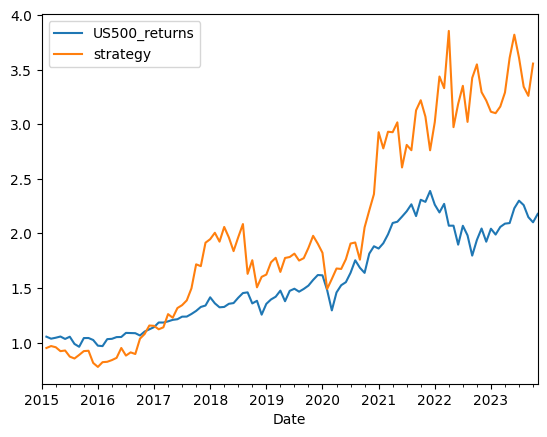

In [8]:
market_analysis.plot_performance()

In [10]:
x = market_analysis.get_current_month_tickers()
x.to_list()

['NVDA', 'LLY', 'CEG', 'META', 'ADBE', 'AVGO']

In [15]:
import requests

def getTicker (company_name):
    url = "https://s.yimg.com/aq/autoc"
    parameters = {'query': company_name, 'lang': 'en-US'}
    response = requests.get(url = url, params = parameters)
    data = response.json()
    company_code = data['ResultSet']['Result'][0]['symbol']
    return company_code

getTicker('BEA')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
#apikeyb
R3EQ3VJGT5BLCZC5

In [2]:
import yfinance as yf
tickers = 'CXO', 'FBHS', 'APC', 'TWTR', 'FLIR', 'RHT', 'ENDP', 'FRC', 'DRE', 'XLNX', 'NBL', 'CELG', 'WCG', 'FTR', 'ESV', 'BBBY', 'VIAB', 'DWDP', 'INFO', 'MNK', 'ALXN', 'ETFC', 'ARNC', 'QEP', 'TSS', 'PBCT', 'NLSN', 'HFC', 'AGN', 'CERN', 'TIF', 'ADS', 'WIN', 'STI', 'AVP', 'LM', 'LLL', 'CTXS', 'SIVB', 'DTV', 'MON', 'MXIM', 'XL', 'YHOO', 'RTN', 'KSU', 'XEC', 'DNR', 'VAR'
x = yf.download(tickers, start='2020-01-01', interval='1mo')['Close']
x


[*********************100%***********************]  49 of 49 completed

49 Failed downloads:
- CXO: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- CELG: No timezone found, symbol may be delisted
- BBBY: No timezone found, symbol may be delisted
- KSU: No timezone found, symbol may be delisted
- LLL: No timezone found, symbol may be delisted
- ADS: No timezone found, symbol may be delisted
- STI: No timezone found, symbol may be delisted
- VAR: No timezone found, symbol may be delisted
- SIVB: No timezone found, symbol may be delisted
- ARNC: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- AGN: No timezone found, symbol may be delisted
- HFC: No timezone found, symbol may be delisted
- MON: No timezone found, symbol may be delisted
- FRC: No timezone found, symbol may be delisted
- FTR: No timezone found, symbol may be delisted
- LM: No timezone found, symbol may be delisted
- CTXS: No timezone 

,ADS,AGN,ALXN,APC,ARNC,AVP,BBBY,CELG,CERN,CTXS,...,TSS,TWTR,VAR,VIAB,WCG,WIN,XEC,XL,XLNX,YHOO
Date,,,,,,,,,,,,,,,,,,,,,


In [30]:
def equal_weighted_portfolio(total_amount, stock_prices):
    """
    Oblicza, ile akcji można kupić z równą kwotą inwestycji dla każdej akcji.

    :param total_amount: Dostępna kwota początkowa do inwestycji.
    :param stock_prices: Słownik z cenami akcji, gdzie klucz to nazwa akcji, a wartość to cena.
    :return: Słownik zawierający liczbę akcji do zakupu dla każdej akcji.
    """
    num_stocks = len(stock_prices)
    amount_per_stock = total_amount / num_stocks

    portfolio = {}
    for stock, price in stock_prices.items():
        num_shares = round((amount_per_stock / price), 1)  # Liczba akcji zaokrąglona w dół
        portfolio[stock] = num_shares

    return portfolio

# Przykład użycia
stock_prices = {'StockA': 100, 'StockB': 200, 'StockC': 50}
total_amount = 1000
portfolio = equal_weighted_portfolio(total_amount, stock_prices)
print(portfolio)

{'StockA': 3.3, 'StockB': 1.7, 'StockC': 6.7}


[*********************100%***********************]  5 of 5 completed
{"labels": ["AAPL: 1.1 shares", "ADBE: 0.3 shares", "AMZN: 1.4 shares", "GOOGL: 1.5 shares", "MSFT: 0.5 shares", "Cash"], "data": [205.04, 179.17, 200.98, 198.88, 184.84, 31.09]}


In [54]:
portfolio_data[0]

'{'

In [37]:
import yfinance as yf

# Lista tickerów
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN"]

# Pobieranie danych
data = yf.download(tickers, period="1d")

# Wyodrębnianie ostatniej ceny zamknięcia
last_close_prices = data['Close'].iloc[-1]

print(last_close_prices)

[*********************100%***********************]  4 of 4 completed
AAPL     186.399994
AMZN     143.559998
GOOGL    132.589996
MSFT     369.670013
Name: 2023-11-10 00:00:00, dtype: float64


In [46]:
last_close_prices.index
last_close_prices.values

array([186.3999939 , 143.55999756, 132.58999634, 369.67001343])

In [48]:
l = {}
for ticker, price in zip(last_close_prices.index, last_close_prices.values):
    l[ticker] = price
l

{'AAPL': 186.39999389648438,
 'AMZN': 143.55999755859375,
 'GOOGL': 132.58999633789062,
 'MSFT': 369.6700134277344}

In [12]:
import json
import yfinance as yf

class EqualWeightedPortfolio:
    def __init__(self, total_amount, tickers, precision=2):
        self.total_amount = total_amount
        self.tickers = tickers
        self.precision = precision
        self.portfolio = {}
        self.cash_left = total_amount
        self.last_close_prices = None
        self.chart_data = None

    def fetch_last_close_prices(self):
        data = yf.download(self.tickers, period="1d")
        self.last_close_prices = data['Close'].iloc[-1]

    def calculate_portfolio(self):
        amount_per_stock = self.total_amount / len(self.tickers)
        self.fetch_last_close_prices()

        for ticker in self.tickers:
            price = self.last_close_prices[ticker]
            num_shares = round(amount_per_stock / price, self.precision)
            self.portfolio[ticker] = num_shares
            self.cash_left -= num_shares * price

        self.cash_left = round(self.cash_left, self.precision)

    def prepare_chart_data(self):
        labels = [f"{ticker}: {shares} shares" for ticker, shares in self.portfolio.items()]
        labels.append("Cash")

        data = [round(shares * self.last_close_prices[ticker], self.precision) for ticker, shares in self.portfolio.items()]
        data.append(self.cash_left)

        self.chart_data = json.dumps({'labels': labels, 'data': data})

    def get_chart_data(self):
        if self.chart_data is None:
            self.calculate_portfolio()
            self.prepare_chart_data()
        return self.chart_data

# Przykład użycia
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "ADBE"]
total_amount = 1000
portfolio = EqualWeightedPortfolio(total_amount, tickers)
portfolio_data = portfolio.get_chart_data()
print(portfolio_data)

[*********************100%***********************]  5 of 5 completed
{"labels": ["AAPL: 1.08 shares", "GOOGL: 1.51 shares", "MSFT: 0.54 shares", "AMZN: 1.4 shares", "ADBE: 0.34 shares", "Cash"], "data": [199.81, 199.79, 198.83, 199.78, 200.92, 0.87]}


In [11]:
portfolio_data[0]

'{'